<a href="https://colab.research.google.com/github/sgroark/artificialintelligence/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Sarah Groark

**Assigment 7**

**Details**: create an MLP classifier that can accurately classify an asteroid as hazardous or non-hazardous from a NASA dataset containing over 4,000 examples of asteroids and 40 of their features.

In [4]:
import pandas as pd
import io
from google.colab import files

#upload nasa_asteroid.csv to colab

uploaded = files.upload()

Saving nasa_asteroid.csv to nasa_asteroid.csv


Final Training Accuracy:  0.9995644599303136
Final Validation Accuracy:  0.9715447154471545
Final Testing Accuracy:  0.9808102345415778



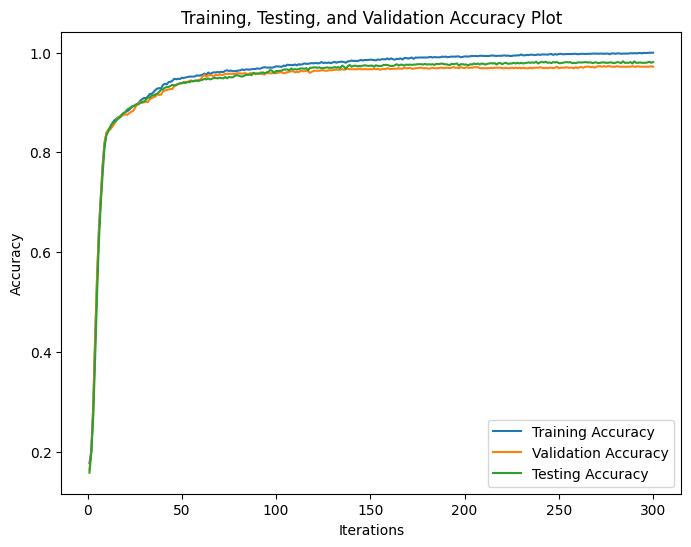

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#read in csv file
data = pd.read_csv(io.BytesIO(uploaded['nasa_asteroid.csv']))


#selects numerical data from the data set (for scaling purposes)
numeric_data = data.select_dtypes(include = ['float64','int64']).columns
X = data[numeric_data]
y = data['Hazardous']

#split the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

scaler = StandardScaler()

#scales numeric data to standardize input
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

#create MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter = 300)

training_acc = []
val_acc = []
test_acc = []

#fit the model for max_iter iterations
for i in range(300):
  mlp.partial_fit(X_train_scaled, y_train, classes = np.unique(y_train))

  training_acc.append(mlp.score(X_train_scaled,y_train))
  val_acc.append(mlp.score(X_val_scaled,y_val))
  test_acc.append(mlp.score(X_test_scaled,y_test))

#print last accuracy scores for each set
print("Final Training Accuracy: ", training_acc[-1])
print("Final Validation Accuracy: ", val_acc[-1])
print("Final Testing Accuracy: ", test_acc[-1])


print("")

#training/test/validation plot
plt.figure(figsize=(8,6))
plt.plot(range(1,301),training_acc, label = 'Training Accuracy')
plt.plot(range(1,301), val_acc, label = 'Validation Accuracy')
plt.plot(range(1,301), test_acc, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training, Testing, and Validation Accuracy Plot')
plt.show()

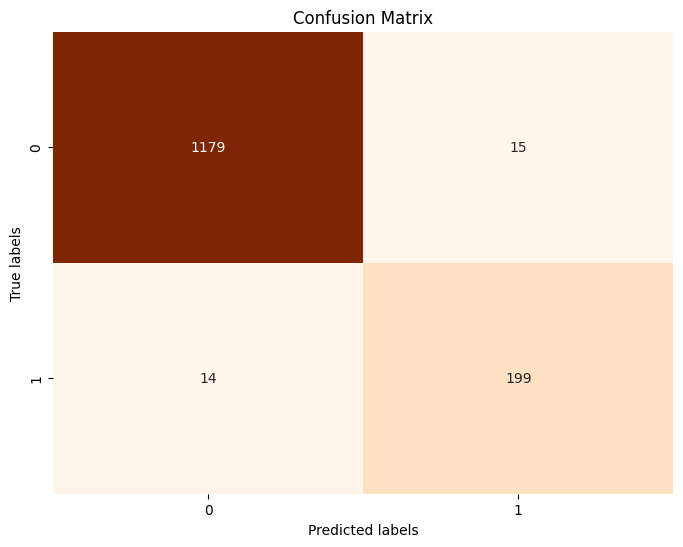

In [6]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = mlp.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

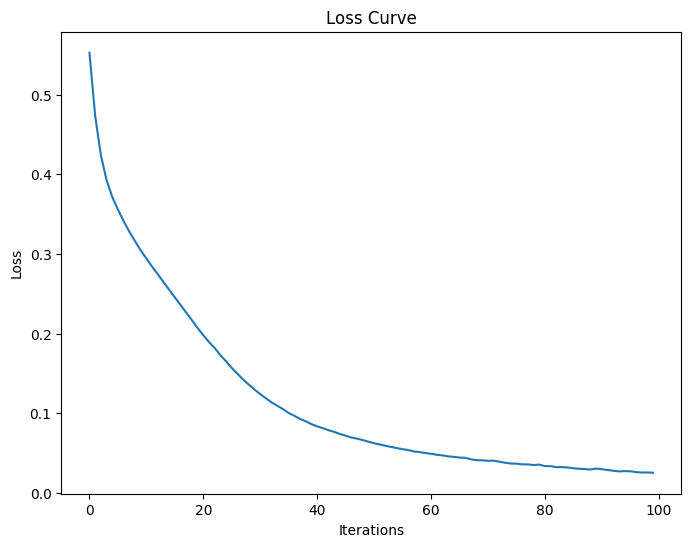

In [7]:
# LOSS CURVE
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [ ]:
# Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 0.992595818815331
Overall Test Accuracy: 0.9815209665955935
